In [72]:
import sys, os
import librosa  
import ffmpeg
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from efficientnet.keras import  preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from PIL import Image

In [2]:
signal, sr = librosa.load('1.wav',duration=10)   

In [3]:
fig = gcf()
DPI = fig.get_dpi()

<Figure size 432x288 with 0 Axes>

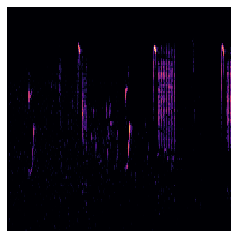

In [4]:
fig = plt.figure()
fig.set_size_inches(224/float(DPI),224/float(DPI))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                        n_fft=1024,
                                        hop_length=1024, 
                                        n_mels=128, 
                                        htk=True, 
                                        fmin=1400, 
                                        fmax=sr/2) 

librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=1400,y_axis='linear')

In [95]:
def fig2data(fig):
    fig.canvas.draw()
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (w,h,4)
    buf = np.roll(buf,3,axis = 2)
    return buf

In [96]:
def fig2img(fig):
    buf = fig2data (fig)
    w, h, d = buf.shape
    return Image.frombytes( "RGB", ( w ,h ), buf.tostring( ) )

In [97]:
image = fig2img(fig)
image = img_to_array(test)
image = np.array([image]) 

C:\Users\Magda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


# Model

In [91]:
classes = np.array(['Acroc','Ember','Parus','Phyll','Sylvi'])
net = MobileNetV2(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(224,224,3))
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(5, activation='softmax', name='softmax')(x)
loaded_model = Model(inputs=net.input, outputs=output_layer)

loaded_model.load_weights('AM_mobilenet_5classes.h5')
loaded_model.compile(optimizer=Adam(lr=5e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
pred = loaded_model.predict(image)

In [103]:
top = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top[i]])+" ({:.3})".format(pred[0][top[i]]))

Parus (0.754)
Ember (0.149)


# Model2 

In [39]:
classes = np.array(['0Parus', '1Turdu', '2Passe', '3Lusci', '4Phoen', '5Erith',
               '6Picap', '7Phoen', '8Garru', '9Passe', '10Cocco', '11Sitta',
               '12Alaud', '13Strep', '14Phyll', '15Delic','16Turdu', '17Phyll',
               '18Fring', '19Sturn', '20Ember', '21Colum', '22Trogl', '23Cardu',
               '24Chlor', '25Motac', '26Turdu'])

In [ ]:
net = efn.EfficientNetB3(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(224,224,3))
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(27, activation='softmax', name='softmax')(x)
loaded_model = Model(inputs=net.input, outputs=output_layer)

loaded_model.load_weights('EfficientNetB3.h5')
loaded_model.compile(optimizer=Adam(lr=5e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
pred = loaded_model.predict(image)

In [ ]:
top = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top[i]])+" ({:.3})".format(pred[0][top[i]]))